# Pre trained network
![imagen](https://www.researchgate.net/publication/336874848/figure/fig1/AS:819325225144320@1572353764073/Illustrations-of-transfer-learning-a-neural-network-is-pretrained-on-ImageNet-and.png)

Estas son las arquitecturas de redes neuronales más utilizadas en la comunidad. Para más detalle sobre el funcionamiento de cada red, consultar el [Hands on Machine Learning for Python](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch14.html#cnn_chapter).
* VGG-16
* VGG-19
* Inception V3
* XCeption
* ResNet-50

Las redes se pueden incorporar entrenadas, o sin entrenar.

## ResNet50V2

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [3]:
# CODE MODEL
base_model = ResNet50V2(include_top= True, input_shape=(224, 224, 3), weights='imagenet', classifier_activation= 'softmax')

In [6]:
len(base_model.layers)

192

In [7]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

Cargamos algunas imagenes desde local, para ver qué tal funciona la red ResNet50V2 ya entrenada.

In [2]:
# CODE READ DATA

import os

def read_data(path):
    X = []
    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224,224))
        print(path + '/' + file)

        X.append(smallimage)
    return np.array(X)


In [9]:
X_test = read_data('img')

#Preprocesar las imagenes tal y como entran en el model
X_test = preprocess_input(X_test)
print(X_test.shape)

img/bear-1.jpg
img/cat.8016.jpg
img/cat.8037.jpg
img/dog.11856.jpg
img/dog.11857.jpg
img/horse.jpg
img/karate.jpg
img/pizza.jpg
(8, 224, 224, 3)


In [10]:
# CODE preds

preds = base_model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [8]:
len(preds)

8

In [9]:
preds

array([[2.6121011e-10, 5.8382682e-10, 4.8970450e-10, ..., 2.4313812e-10,
        3.7808892e-10, 1.9815962e-09],
       [1.9770747e-05, 5.4083081e-05, 1.6641272e-05, ..., 1.1837218e-05,
        1.1198807e-04, 2.5801535e-04],
       [8.5167990e-08, 1.4822021e-07, 2.9617533e-08, ..., 6.2942000e-08,
        3.8534407e-07, 2.3654381e-06],
       ...,
       [6.6323020e-07, 4.3208752e-06, 8.0825257e-06, ..., 1.7418483e-06,
        1.0386842e-05, 2.9400449e-05],
       [1.0001791e-07, 7.6349439e-05, 2.6081119e-05, ..., 2.8111306e-06,
        5.1169086e-06, 9.2755590e-06],
       [4.6688960e-08, 3.3564541e-07, 8.2978929e-08, ..., 4.4028585e-07,
        4.2722058e-07, 1.8702471e-08]], dtype=float32)

In [10]:
preds[0]

array([2.61210109e-10, 5.83826820e-10, 4.89704499e-10, 5.27678012e-10,
       1.35562103e-10, 2.87967539e-10, 6.59834409e-11, 7.18286056e-11,
       6.25039576e-10, 3.11820014e-10, 1.52062599e-10, 7.70551400e-10,
       1.91817962e-09, 4.07081091e-10, 2.66354516e-09, 1.20478308e-10,
       9.37361369e-11, 5.09612144e-11, 3.78373166e-10, 1.40526049e-10,
       2.49939680e-10, 6.18146589e-10, 1.15360319e-10, 4.30539437e-10,
       1.74373876e-10, 1.62056146e-09, 4.31613217e-10, 5.37126787e-10,
       2.47034038e-09, 3.71354975e-10, 2.26993355e-11, 2.66729056e-10,
       1.05172338e-09, 4.54396937e-10, 3.60045604e-10, 3.70621173e-10,
       9.54341273e-10, 2.10132148e-10, 1.63949770e-10, 6.46875747e-11,
       2.35527681e-10, 6.35315828e-11, 5.89719218e-10, 2.58056007e-11,
       1.05003117e-10, 3.16192683e-10, 1.34642422e-10, 1.72908354e-10,
       9.56593207e-11, 2.62466632e-10, 1.56738147e-11, 8.51353779e-11,
       7.17753634e-10, 5.84905790e-10, 2.27167590e-10, 4.34364156e-10,
      

In [20]:
len(preds[0])

1000

In [23]:
decodes = decode_predictions(preds, top= 1) #top = 3

In [24]:
decodes

[[('n02132136', 'brown_bear', 0.9994438)],
 [('n02124075', 'Egyptian_cat', 0.6498499)],
 [('n02124075', 'Egyptian_cat', 0.82098395)],
 [('n02106550', 'Rottweiler', 0.73290974)],
 [('n02106030', 'collie', 0.99525696)],
 [('n02113799', 'standard_poodle', 0.32455745)],
 [('n09835506', 'ballplayer', 0.54023355)],
 [('n07873807', 'pizza', 0.99713045)]]

In [25]:
# CODE decode preds
for j in decodes:
    print('####################')
    for i,decode in enumerate(j):
        print("Predicted:\n", decode[1], decode[2])

####################
Predicted:
 brown_bear 0.9994438
####################
Predicted:
 Egyptian_cat 0.6498499
####################
Predicted:
 Egyptian_cat 0.82098395
####################
Predicted:
 Rottweiler 0.73290974
####################
Predicted:
 collie 0.99525696
####################
Predicted:
 standard_poodle 0.32455745
####################
Predicted:
 ballplayer 0.54023355
####################
Predicted:
 pizza 0.99713045


## VGG16
En este caso vamos a importar la red VGG16, que utilizaremos como red preentrenada y completaremos con una fully connected layer. 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

IM_SIZE=32

TRAIN_PATH = 'C:/Users/misla/Documents/Bootcamp/Profesor/Convolucionales/dogsandcats_teoria/dogsandcats/train'
filenames = os.listdir(TRAIN_PATH)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)
    
df = pd.DataFrame({
    'filenames': filenames,
    'category': categories
})

train_df, validate_df = train_test_split(df,
                                         test_size=0.20,
                                         random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [27]:
train_df.head()

,filenames,category
0,cat.3337.jpg,cat
1,dog.12039.jpg,dog
2,cat.2542.jpg,cat
3,dog.10283.jpg,dog
4,dog.10384.jpg,dog


In [4]:
from keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [7]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    TRAIN_PATH,
                                                    x_col='filenames',
                                                    y_col='category',
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (IM_SIZE, IM_SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              TRAIN_PATH,
                                                              x_col='filenames',
                                                              y_col='category',
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (IM_SIZE, IM_SIZE))

Found 5260 validated image filenames belonging to 2 classes.
Found 1316 validated image filenames belonging to 2 classes.


In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

# CODE model
base_model = VGG16(input_shape=(IM_SIZE,IM_SIZE,3),
                    include_top=False,
                    weights = 'imagenet'
                )

In [9]:
len(base_model.layers)

19

In [10]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [11]:

##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
    
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [9]:
len(model.layers)

23

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [47]:
X_test[0:1].shape

(1, 224, 224, 3)

In [91]:
prueba_entrenar = cv2.resize(X_test[0], (32, 32))

In [92]:
prueba_entrenar.shape

(32, 32, 3)

In [93]:
prueba_entrenar = prueba_entrenar.reshape(-1, 32, 32, 3)

In [108]:
X_test[1:3].shape

(2, 224, 224, 3)

In [94]:
prueba_entrenar.shape

(1, 32, 32, 3)

In [95]:
prueba_entrenar.shape

(1, 32, 32, 3)

In [100]:
y = np.array([1])

In [103]:
y

array([1])

In [105]:
prueba_entrenar.shape

(1, 32, 32, 3)

In [102]:
model.fit(prueba_entrenar, y)

1/1 [==============================] - 5s 5s/step - loss: 1.3488 - acc: 0.0000e+00


In [112]:
prueba_entrenar

array([[[[ 0.3176471 ,  0.45882356,  0.12941182],
         [ 0.24705887,  0.39607847,  0.04313731],
         [ 0.28627455,  0.43529415,  0.082353  ],
         ...,
         [ 0.12941182,  0.3176471 , -0.08235294],
         [ 0.2313726 ,  0.41176474,  0.082353  ],
         [ 0.34901965,  0.4901961 ,  0.19215691]],

        [[ 0.33333337,  0.48235297,  0.12156868],
         [ 0.27058828,  0.41176474,  0.03529418],
         [ 0.27058828,  0.4431373 ,  0.05882359],
         ...,
         [ 0.26274514,  0.427451  , -0.01960784],
         [ 0.19215691,  0.3803922 , -0.0745098 ],
         [ 0.28627455,  0.4431373 ,  0.04313731]],

        [[ 0.33333337,  0.4901961 ,  0.07450986],
         [ 0.3803922 ,  0.5137255 ,  0.082353  ],
         [ 0.21568632,  0.4039216 , -0.06666666],
         ...,
         [ 0.20784318,  0.38823533, -0.1607843 ],
         [ 0.28627455,  0.41960788, -0.00392157],
         [ 0.14509809,  0.34901965, -0.12941176]],

        ...,

        [[ 0.254902  ,  0.35686278, -0

In [117]:
prueba_entrenar[0].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


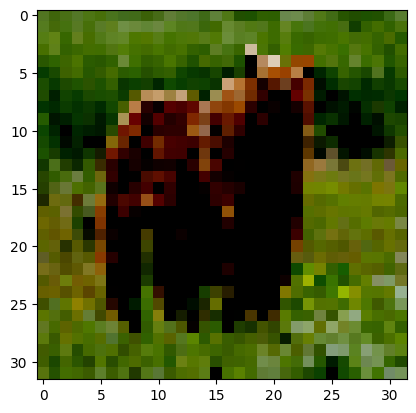

In [118]:
plt.imshow(prueba_entrenar[0])

In [10]:
vgghist = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = 128,
                    epochs = 5)

Epoch 1/5
 17/263 [>.............................] - ETA: 3:02 - loss: 0.7951 - acc: 0.5529

KeyboardInterrupt: 

## ResNet50V2 sin últimas capas y sin pesos preentrenados

In [14]:
IM_SIZE=32

base_model = ResNet50V2(input_shape = (224, 224, 3),
                       include_top = None,
                       weights = None,
                       classifier_activation= "softmax")


train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    TRAIN_PATH,
                                                    x_col='filenames',
                                                    y_col='category',
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (IM_SIZE, IM_SIZE))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              TRAIN_PATH,
                                                              x_col='filenames',
                                                              y_col='category',
                                                              batch_size = 20,
                                                              class_mode = 'binary',
                                                              target_size = (IM_SIZE, IM_SIZE))

Found 5260 validated image filenames belonging to 2 classes.
Found 1316 validated image filenames belonging to 2 classes.


In [15]:
len(base_model.layers)

190

In [12]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [16]:
x = layers.GlobalAveragePooling2D()(base_model.output)

# Add a fully connected layer with 100352 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
    
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [17]:
len(model.layers)

194

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [129]:
y

array([1])

In [ ]:
model.fit(train_generator,
         validation_data = validation_generator,
         steps_per_epoch = 100,
         epochs = 5)